## TWO SAMPLE T-TEST

- you need only the sample values and not form the population (you need only the sample mean and standard deviation of the samples).
- sample size for both populations < 30  to use the t-Student distribution


t = (mean(sample1)-mean(sample2))  / root((s1)^2/n1 + (s2)^2/n2)

For 2-tails:


tc = stats.scipy.t.ppf(1-(0.05/2),df) = ....

EXERCISE:

Let's generate two populations of students.

- Male students with an average speed of 140km/h and standard deviation of 15km/h.

- Female students with an average speed of 110km/h and standard deviation of 10km/h.

H0: mu_speed_males = mu__speed_females H1: mu_speed_males != mu__speed_females

In [21]:
import scipy.stats as stats
import numpy as np


## create first the 2 populations (size choice = 1000 (big))

pop_males = stats.norm.rvs(size=1000,loc=140, scale = 15, random_state = 1)
pop_females = stats.norm.rvs(size=1000,loc=110, scale = 10, random_state = 7)

In [31]:
## create second the 2 samples

males_sample = np.random.choice(pop_males,size=34, replace=False) 
females_sample = np.random.choice(pop_females,size=29, replace=False) 

# replace=False  -->  


In [23]:
type(pop_males)

numpy.ndarray

In [30]:


mean_males = np.mean(males_sample)# use np.mean()
mean_females = np.mean(females_sample)# use np.mean()

print("The sample mean of males is: {:.2f}".format(mean_males))
print("The sample mean of females is: {:.2f}".format(mean_females))

The sample mean of males is: 141.16
The sample mean of females is: 111.71


In [25]:
std_males = np.std(males_sample)
std_females = np.std(females_sample)

print("The sample standard deviation of males is: {:.2f}".format(std_males))
print("The sample standard deviation of females is: {:.2f}".format(std_females))

The sample standard deviation of males is: 14.66
The sample standard deviation of females is: 9.68


In [26]:
t = ( mean_males - mean_females ) / np.sqrt( ((std_males**2)/34) + ((std_females**2)/29 ) )

print("Our t statistic is: {:.2f}".format(t))

Our t statistic is: 10.50


In [27]:
tc = stats.t.ppf(1-(0.05/2),df=28) 

print("The tc critical value is: {:.2f}".format(tc))

The tc critical value is: 2.05


## visual graphic of the distribution and the t and tc values

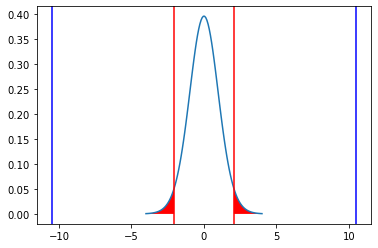

In [28]:


import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

%matplotlib inline

def visual_test(statistic, critical, dist = 'Norm', df = 0):
    '''
    Function to plot the normal or the t-student distribution 
    showing the location of the critical values and the statistic location.
    Inputs:
        statistic -> user's statistic
        critical  -> critical value
    Parameter:
        dist -> distribution to use
        df   -> degrees of freedom
    Outputs:
        Plots the corresponding distribution showin the user statistic location and the critical value.
    '''

    mu = 0
    sigma = 1

    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
    x0 = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)

    if ( dist == 'Norm' ):
        plt.plot(x, stats.norm.pdf(x, mu, sigma))
        plt.fill_between(x0,stats.norm.pdf(x, mu, sigma),where = (x < -critical),facecolor='red')
        plt.fill_between(x0,stats.norm.pdf(x, mu, sigma),where = (x > critical),facecolor='red')
    else:
        if ( df == 0 ):
            while ( df == 0 or type(df) != int):
                try:
                    df = int(input("Set the correct value of degrees of freedom please: " )) 
                except:
                    df = 0       
        plt.plot(x, stats.t.pdf(x,df))
        plt.fill_between(x0,stats.t.pdf(x,df),where = (x < -critical),facecolor='red')
        plt.fill_between(x0,stats.t.pdf(x,df),where = (x > critical),facecolor='red')

    plt.axvline(-critical, c = 'r')
    plt.axvline(critical, c = 'r')
    plt.axvline(-statistic,c='b')
    plt.axvline(statistic,c='b')

    plt.show()

visual_test(t,tc,dist = 't',df=28)

### t statistic value: x value on the blue line 
### tc critical value: x value on the red line